In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Defining Location/Central tendency

In [2]:
df = pd.read_csv('state.csv')

In [3]:
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
df[['Population']].mean()

Population    6162876.3
dtype: float64

In [5]:
df[['Population']].median()

Population    4436369.5
dtype: float64

In [6]:
df['Population'].mean()

6162876.3

In [7]:
from scipy import stats
stats.trim_mean(df['Population'], 0.1)

4783697.125

In [8]:
import numpy as np

In [9]:
# weighted mean
np.average(df['Murder.Rate'], weights=df['Population'])

4.445833981123393

In [10]:
# weighted median
import wquantiles as wq

wq.median(df['Murder.Rate'], weights=df['Population'])

4.4

### Variability

##### measure of the extent to which data is surrounding the central value i.e. tightly clustered or spread out.

In [11]:
# deviation is the difference of a value from estimate of location i.e. mean/median
## mean-absolute-deviation is the sum of absolute values of deviations divide by total number of values.

### variance is average of squared deviations
#### standard-deviation is the squared root of variance

In [12]:
# ***** Median-Absolute-Deviation-From-the-Median [MAD] is more robust estimate of variability than the threee above
# MAD = Median(|x1-m|, |x2-m|,...,|xn-m|)

In [13]:
### Perccentile[P] is a value such that P precent of values take on this value or less and [100-P] percent have this value or greater
### quantile is fractional percentile 80th  percentile=0.8 quantile

In [14]:
# IQR [Inter-Quartile-Range] = 75th percentile - 25th percentile

In [15]:
# standard deviation

df['Population'].std()

6848235.347401142

In [16]:
# IQR
df['Population'].quantile(0.75) - df['Population'].quantile(0.25)

4847308.0

In [17]:
from statsmodels import robust

In [18]:
# median-absolute-deviation from median
robust.scale.mad(df['Population'])

3849876.1459979336

#### Estimates of Location

- Mean
- Median
- Trimmed Mean
- Trimmed Median
- Weighted Mean
- Weighted Median

#### Estimates of Variability

- Deviation
- Mean Absolute Deviation
- Standard Deviation
- Variance
- Percentile
- Quantile
- Inter Quantile Range
- Median Absolute Deviation from the Median

### Exploring the Data Distribution

In [19]:
# quantiles
df['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

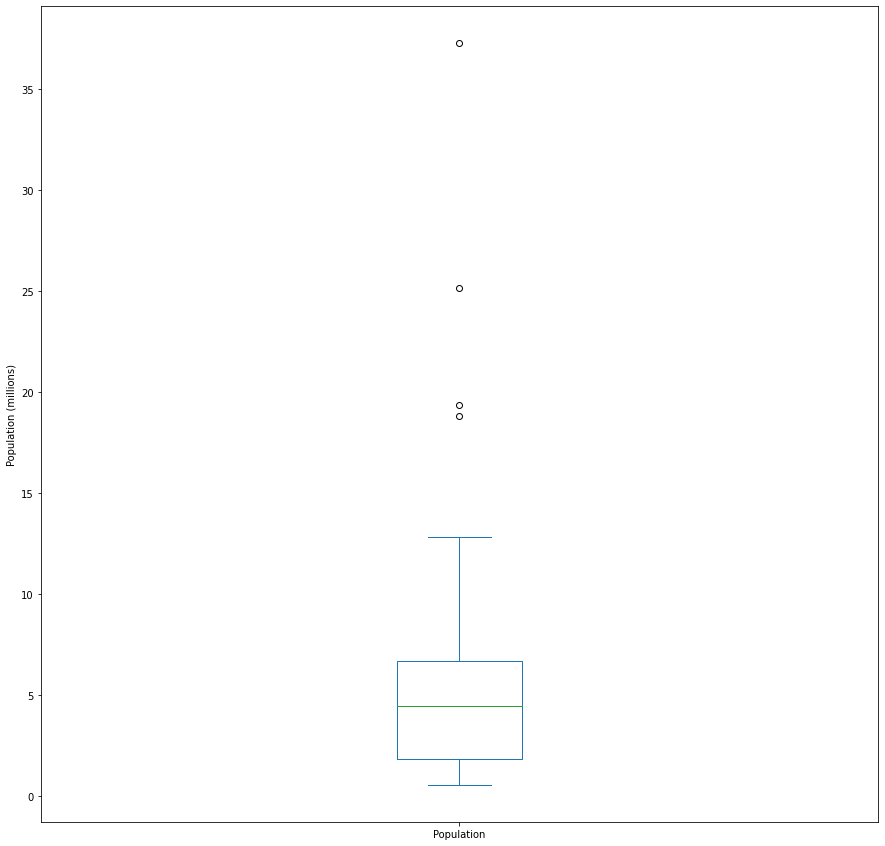

In [20]:
# boxplots are based on percentiles and quickly visualize data distribution

ax = (df['Population']/1000000).plot.box(figsize=(15,15))
ax.set_ylabel('Population (millions)')

In [21]:
# frequency table

binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [25]:
states = []

for i in binnedPopulation.value_counts().index:
    ss = []
    for j, k in zip(df['Population'], df['Abbreviation']):
        if j in i:
            ss.append(k)
    states.append(ss)

freq_dict = {
    'BinRange': binnedPopulation.value_counts().index,
    'Count': binnedPopulation.value_counts().values,
    'States': states
}
freq_table = pd.DataFrame(freq_dict)

In [26]:
freq_table

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"[AK, AR, CT, DE, HI, ID, IA, KS, ME, MS, MT, N..."
1,"(4232659.0, 7901692.0]",14,"[AL, AZ, CO, IN, KY, LA, MD, MA, MN, MO, SC, T..."
2,"(7901692.0, 11570725.0]",6,"[GA, MI, NJ, NC, OH, VA]"
3,"(11570725.0, 15239758.0]",2,"[IL, PA]"
4,"(15239758.0, 18908791.0]",1,[FL]
5,"(18908791.0, 22577824.0]",1,[NY]
6,"(22577824.0, 26246857.0]",1,[TX]
7,"(33584923.0, 37253956.0]",1,[CA]
8,"(26246857.0, 29915890.0]",0,[]
9,"(29915890.0, 33584923.0]",0,[]


Text(0.5, 0, 'Population (millions)')

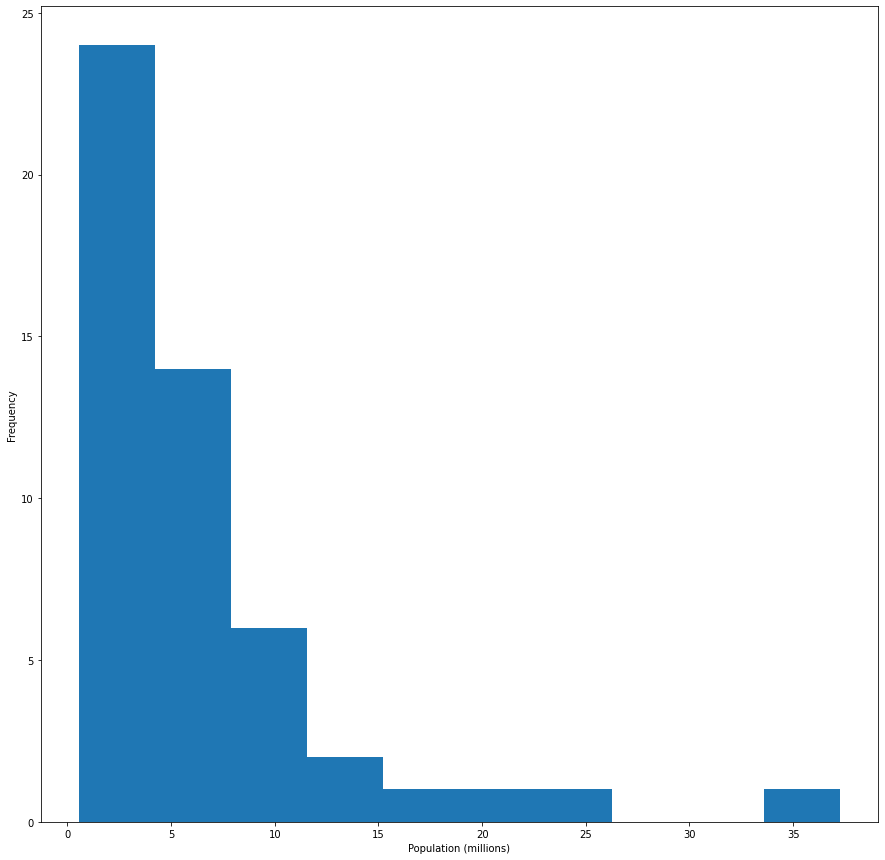

In [27]:
ax = (df['Population']/1000000).plot.hist(figsize=(15,15))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

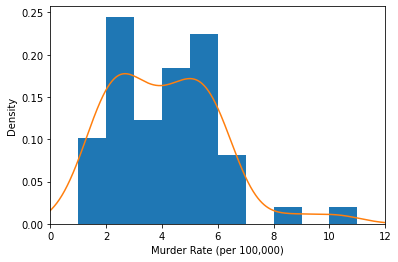

In [28]:
# density graph

ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

### Exploring Binary and Categorical Data

for categorical data simple proportions or percentages tell the story

In [29]:
dfw = pd.read_csv('dfw_airline.csv')

Text(0, 0.5, 'Count')

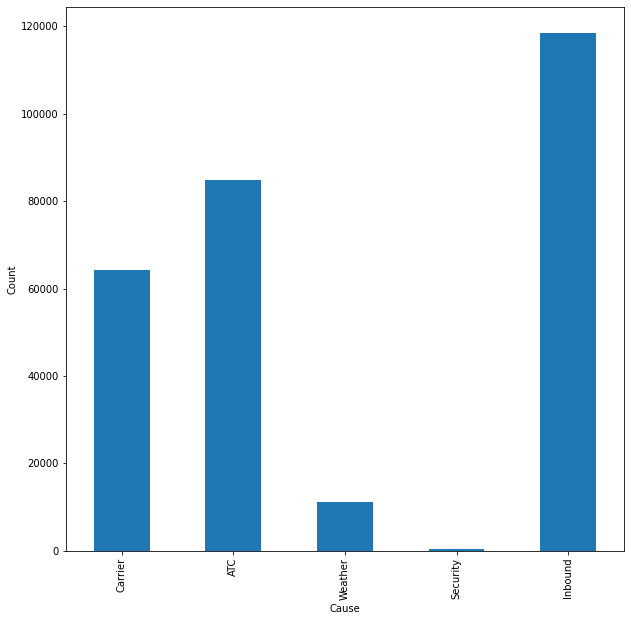

In [31]:
ax = dfw.transpose().plot.bar( figsize=(10,10) ,legend=False)
ax.set_xlabel('Cause')
ax.set_ylabel('Count')

In [37]:
sp500_px = pd.read_csv('sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('sp500_sectors.csv')

In [38]:
sp500_px.head(5)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


<AxesSubplot:>

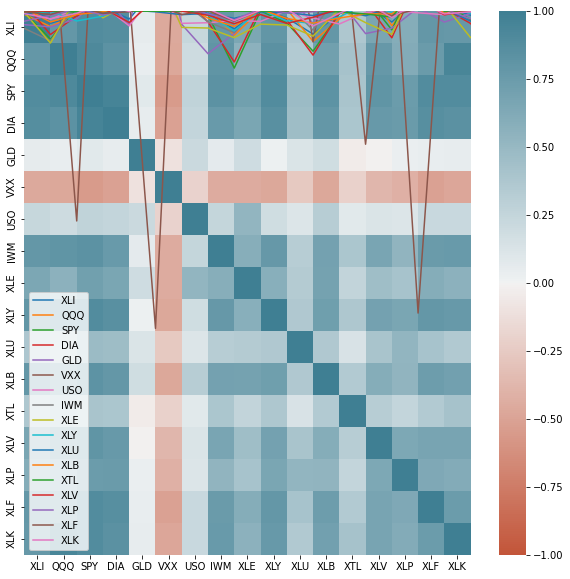

In [48]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
ax = etfs.plot(figsize=(10,10))
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
cmap=sns.diverging_palette(20, 220, as_cmap=True), ax=ax)

In [49]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


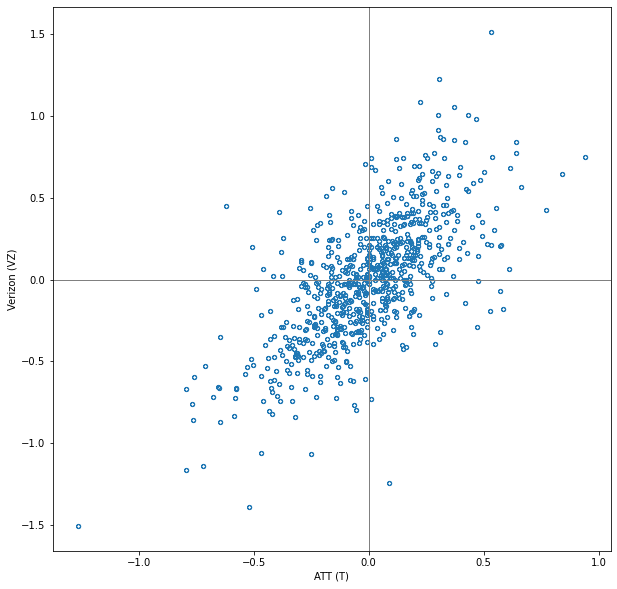

In [51]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(10,10), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)